In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('all')
from nltk.sentiment import SentimentIntensityAnalyzer

from tqdm.notebook import tqdm


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/ds_intern/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/ds_intern/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/ds_intern/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/ds_intern/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/ds_intern/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Down

In [419]:
df = pd.read_csv('global-warming.csv')

In [420]:
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


## EDA

In [421]:
df.shape

(15819, 3)

In [422]:
df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [423]:
df.duplicated().sum()

0

In [424]:
df.dtypes

sentiment     int64
message      object
tweetid       int64
dtype: object

In [425]:
df.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [426]:
df['tweetid'].nunique()

15819

Text(0, 0.5, 'Count')

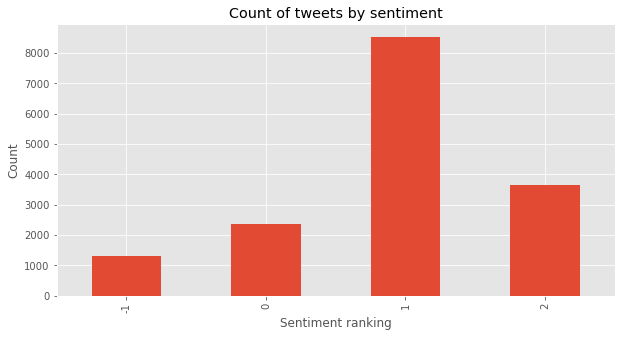

In [427]:
ax = df['sentiment'].value_counts().sort_index().plot(kind='bar', title='Count of tweets by sentiment',
                                                figsize=(10,5))
ax.set_xlabel('Sentiment ranking')
ax.set_ylabel('Count')

## NLTK

In [428]:
example = df['message'][52]
print(example)

Chris: Who is it then that initially talked about climate change?
Me: * thinked for three seconds * ... The EuropeaÃ¢â‚¬Â¦ https://t.co/VwlQICy0H0


In [429]:
toekens = nltk.word_tokenize(example)
print(toekens)

['Chris', ':', 'Who', 'is', 'it', 'then', 'that', 'initially', 'talked', 'about', 'climate', 'change', '?', 'Me', ':', '*', 'thinked', 'for', 'three', 'seconds', '*', '...', 'The', 'EuropeaÃ¢â‚¬Â¦', 'https', ':', '//t.co/VwlQICy0H0']


In [430]:
tagged = nltk.pos_tag(toekens)
print(tagged)

[('Chris', 'NN'), (':', ':'), ('Who', 'WP'), ('is', 'VBZ'), ('it', 'PRP'), ('then', 'RB'), ('that', 'IN'), ('initially', 'RB'), ('talked', 'VBD'), ('about', 'IN'), ('climate', 'NN'), ('change', 'NN'), ('?', '.'), ('Me', 'NN'), (':', ':'), ('*', 'NN'), ('thinked', 'VBD'), ('for', 'IN'), ('three', 'CD'), ('seconds', 'NNS'), ('*', 'VBP'), ('...', ':'), ('The', 'DT'), ('EuropeaÃ¢â‚¬Â¦', 'NNP'), ('https', 'NN'), (':', ':'), ('//t.co/VwlQICy0H0', 'NN')]


In [431]:
entities = nltk.chunk.ne_chunk(tagged)
print(entities)

(S
  (GPE Chris/NN)
  :/:
  Who/WP
  is/VBZ
  it/PRP
  then/RB
  that/IN
  initially/RB
  talked/VBD
  about/IN
  climate/NN
  change/NN
  ?/.
  Me/NN
  :/:
  */NN
  thinked/VBD
  for/IN
  three/CD
  seconds/NNS
  */VBP
  .../:
  The/DT
  EuropeaÃ¢â‚¬Â¦/NNP
  https/NN
  :/:
  //t.co/VwlQICy0H0/NN)


In [432]:
sia = SentimentIntensityAnalyzer()

In [433]:
sia.polarity_scores('South Africa is a poor country')

{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}

In [434]:
results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['message']
    myid = row['tweetid']
    results[myid] = sia.polarity_scores(text)

  0%|          | 0/15819 [00:00<?, ?it/s]

In [435]:
vaders = pd.DataFrame(results).T
vaders.reset_index().rename(columns={'index':'tweetid'})
#vaders = vaders.merge(df, how='left')
vaders.head()

,neg,neu,pos,compound
625221,0.000,0.905,0.095,0.2244
126103,0.167,0.552,0.281,0.1159
698562,0.000,1.000,0.000,0.0000
573736,0.245,0.755,0.000,-0.5994
466954,0.299,0.701,0.000,-0.7506


In [436]:
'''ax = sns.barplot(data=vaders, x ='Score', y='compound')
ax.set_title('Compund Score by tweets')
plt.show()'''

"ax = sns.barplot(data=vaders, x ='Score', y='compound')\nax.set_title('Compund Score by tweets')\nplt.show()"